Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and pre-processing

In [ ]:
#importing data from csv into padas table
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
#Checking the first 5 rows of the dataset
car_dataset.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#checking no.of rows and columns
car_dataset.shape

(4340, 8)

In [ ]:
#getting some info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#checking the no.of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
#checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the Categorical data

In [ ]:
#converting categorical data into numerical data(encoding data)
#encoding the fuel coloumn
car_dataset.replace({'fuel':{'Petrol':0, 'Diesel':1,'CNG':2,'LPG':3, 'Electric':4}},inplace=True)

#encoding seller type column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding transmission column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding owner column
car_dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3}}, inplace=True)

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


Splitting the data and the target

In [ ]:
X=car_dataset.drop(['name','selling_price'],axis=1)

Y = car_dataset['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission owner
0     2007      70000     0            0             0     0
1     2007      50000     0            0             0     0
2     2012     100000     1            0             0     0
3     2017      46000     0            0             0     0
4     2014     141000     1            0             0     1
...    ...        ...   ...          ...           ...   ...
4335  2014      80000     1            0             0     1
4336  2014      80000     1            0             0     1
4337  2009      83000     0            0             0     1
4338  2016      90000     1            0             0     0
4339  2016      40000     0            0             0     0

[4340 rows x 6 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Training our Model


1.Linear Regression

In [ ]:
#loading linear regression
lin_reg_model = LinearRegression()

In [ ]:
print(X_train.head())


      year  km_driven  fuel  seller_type  transmission owner
3581  2017      70000     1            0             0     0
4191  2012      72000     1            1             0     0
2450  2017      40000     0            0             1     0
984   2014      70000     1            0             0     0
3546  2018      35000     0            0             0     0


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#using R squarred Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.4292133062474386


Visualize the actual prices and actual prices

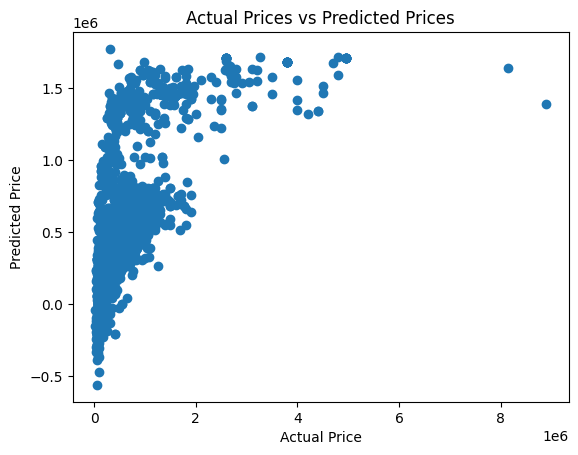

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#using R squarred Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.49306154864226504


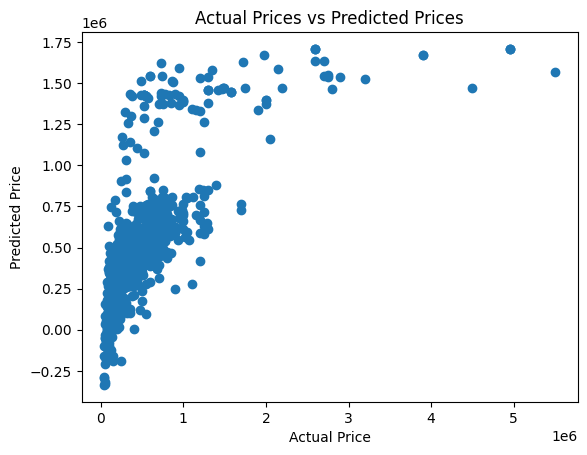

In [ ]:
#visualizing
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()